# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
# 1
a = torch.zeros([3, 4]).float()
b = torch.zeros([12]).float()

# 2
c = b.reshape(2, 2, 3)

# 3
a[:,0]

tensor([0., 0., 0.])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
# 1
a = torch.zeros([5, 2]).float()
b = torch.zeros([1, 10]).float()

# 2
c = b.reshape(5, 2)

# 3
a * 4
a / 4
a % 4
a + 4
a - 4

tensor([[-4., -4.],
        [-4., -4.],
        [-4., -4.],
        [-4., -4.],
        [-4., -4.]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
# 1
images = torch.zeros(100, 200, 200, 3)

# 2
for i in range(0, len(images)):
  images[i][i*2] = torch.empty(200, 3).fill_(255)
  images[i][i*2+1] = torch.empty(200, 3).fill_(255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


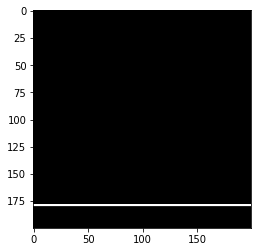

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


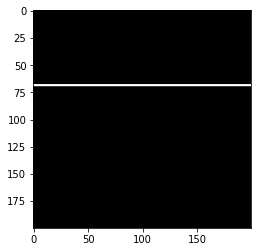

In [ ]:
plt.imshow(images[89])
plt.show()

plt.imshow(images[34])
plt.show()

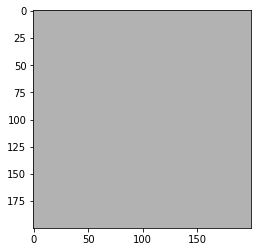

In [ ]:
# 3

plt.imshow((images.float().mean(0) * 70).int())
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.empty(2, 3, 4).uniform_()
b = torch.empty(1, 8, 3).uniform_()

c = b.reshape(2, 3, 4)

c = c.cpu()
a = a.cpu()

a = torch.autograd.Variable(torch.FloatTensor(a), requires_grad=False)
c = torch.autograd.Variable(torch.FloatTensor(c), requires_grad=True)

L = torch.mean((c - a)**2)
d = torch.autograd.grad(outputs=L, inputs=c)
print(d)

(tensor([[[ 0.0605,  0.0207,  0.0685,  0.0438],
         [-0.0006, -0.0554,  0.0232,  0.0435],
         [-0.0473,  0.0503, -0.0022, -0.0225]],

        [[ 0.0139,  0.0500,  0.0116,  0.0332],
         [-0.0024, -0.0278,  0.0783, -0.0580],
         [-0.0441,  0.0200,  0.0171, -0.0460]]]),)
